# Supervised Machine Learning - Key Techniques

In the previous chapters, several common machine learning models were introduced. Code-wise it is fairly simple to apply such models since **Scikit-Learn** gives us a simple interface to define, train, and apply such models.

The workflow always looks very similar, independent of the type of model you chose:

```python
my_model = ScikitLearnModel(parameter1, parameter2 ...)

# Train the model
my_model.fit(X, y)

# Make predictions
my_model.predict(X_new)
```

In practice, however, it requires a lot more to successfully apply machine learning techniques. First of all, machine learning notoriously **requires experience**, so better be prepared to spend quite some time working on machine learning tasks before you start to get the feeling that you know how to do this in practice. There are plenty of nice tutorials and challenges out there (e.g., on Kaggle). Even better is of course if you can get actual real world problems where you can explore the possibilities of machine learning. This could be small projects related to your studies or a job. Or you just invent your own small challenges...

Secondly, there is at least a few more **key concepts about model training and evaluation** that are (in my eyes) absolutely essential. Let's try to quickly give a tour in this chapter.

## Model Evaluation

Model evaluation is crucial in understanding the performance of machine learning algorithms. Beyond the basic metrics introduced previously like accuracy and confusion matrices, it is very useful to know more about additional metrics to capture different aspects of model performance comprehensively.

First off, there is not a simple general answer to which metric is the best. This largely depends on the type of data, the type of model, and the actual question we want to answer with our model. Let's take an example of a use case where we want to predict fraudulent phone calls from data such as call duration, call origin, time, etc. This data could easily have many more regular calls than fraudulent calls, let's assume we have 99,000 non-fraudulent calls and 1,000 fraudulent calls in the data. We call this **biased data**, and handling this correctly is one of the most common challenges in machine learning. 

We now train a machine learning model, say a decision tree, to predict if a phone call is fraudulent or not. What would be a good accuracy for such a model?

If you think about this for a moment (please do!), then you might realize that it is not easy to define what a *good* accuracy value is. For this reason, you should never only present an accuracy value without context! Always at least ask what would be achievable with little effort and compare to this **baseline**. In the phone call example, I can easily come up with a toy "model" that will always predict `non-fraudulent`. What would the accuracy of this toy model be?

The accuracy is the fraction of correct predictions, and if I simply label all calls as non-fraudulent I would be correct in $99%$ of the cases. So, my accuracy becomes $0.99$. Without any context, that might look like a good result, but this baseline example makes clear that a model with such an accuracy is not at all impressive on the given task.

The confusion matrix we used earlier will do much better here because this will also reveal that our toy model does not discover any of the fraudulent calls (which makes it completely useless for any application...).



### Detailed Model Evaluation Metrics (classification)
Here are a few of the most commonly used metrics to evaluate classification models.

#### 1. Confusion Matrix

A confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model, providing insight into the types of errors made by the classifier.

- Elements:

  - **True Positives (TP)**: Correct positive predictions.
  - **False Positives (FP)**: Incorrectly predicted positives (Type I error).
  - **True Negatives (TN)**: Correct negative predictions.
  - **False Negatives (FN)**: Incorrectly predicted negatives (Type II error).

In the fraud detection example, a false negative would be more dangerous and costly than a false positive. A high number of FN means many fraudulent calls are not being detected. Conversely, while FP might cause some inconvenience (e.g., blocking legitimate calls), it is preferable over missing actual frauds.

#### 2. Precision and Recall

Precision and recall are metrics that provide more insight into the accuracy of positive predictions and the classifier's ability to recover all relevant instances, respectively.

- **Precision (Positive Predictive Value)**: The ratio of correctly predicted positive observations to the total predicted positives.

  $$
  Precision = \frac{TP}{TP + FP}
  $$
  
  High precision indicates a low false positive rate, which is crucial in scenarios where the cost of a false positive is high, such as in email spam classification.

- **Recall (Sensitivity, True Positive Rate)**: The ratio of correctly predicted positive observations to all observations in actual class.

  $$
  Recall = \frac{TP}{TP + FN}
  $$

  High recall is vital in medical scenarios or fraud detection, where failing to detect an anomaly can have severe consequences.

#### 3. F1 Score

The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is particularly useful when the class distribution is uneven (biased data).

- Formula:

  $$
  F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
  $$
  
  The F1 score is an excellent measure to use if you need to seek a balance between Precision and Recall and there is an uneven class distribution (as in the case of your fraudulent vs. non-fraudulent calls scenario).

#### 4. Accuracy

As previously discussed, accuracy is the ratio of correctly predicted observations to the total observations and can be misleading in the presence of an imbalanced dataset.

- Formula:

  $$
  Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
  $$


### Detailed Model Evaluation Metrics (Regression)
Here are a few of the most commonly used metrics to evaluate regression models.

#### 1. Mean Absolute Error (MAE)

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

- Formula:

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
  $$

  where $y_i$ are the actual values and $\hat{y}_i$ are the predicted values.

#### 2. Mean Squared Error (MSE)

MSE is like MAE but squares the difference before summing them all instead of using the absolute value. This has the effect of heavily penalizing larger errors.

- Formula:

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

  MSE is more sensitive to outliers than MAE and tends to emphasize larger differences.


There are many more metrics available, such as `RMSE` or `R-squared`, but we will not cover them in this course.

In Scikit-Learn all those scores are already implemented:
```python
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, f1_score

# Assuming y_true and y_pred are available
print("Accuracy:", accuracy_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
```

## Training and Testing Strategies

Developing a robust machine learning model involves more than just selecting the right algorithm. Equally crucial are the strategies employed for training and testing the model. These strategies are fundamental to ensuring that the model performs well not just on the data it was trained on, but also on new, unseen data. This section explores various methodologies for dividing your dataset, training your models, and validating their performance to ensure reliability and accuracy in predictions.

### Splitting Your Data: Training, Validation, and Test Sets

**1. Train-Test Split**
The most basic approach to training and testing a machine learning model is to divide your data into two sets: the training set and the test set. The typical ratios are 70% for training and 30% for testing, but these can vary depending on the dataset size.

- **Purpose**: Ensures that the model can be evaluated on unseen data.

- Method:

  ```python
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  ```


**2. Train-Validation-Test Split**
When tuning hyperparameters or making decisions about model architecture, it’s crucial to have a third split: the validation set.

- **Purpose**: Allows for model tuning without touching the test set, thereby keeping the test set as a truly unseen dataset for final model evaluation.
- **Implementation Tip**: Reserve a part of the training set for validation or use techniques like cross-validation.

### Cross-Validation: Enhancing Model Validation

**Cross-validation** is a robust method for estimating the effectiveness of your model which is especially useful when dealing with limited data.

- **K-Fold Cross-Validation**: The data set is divided into 'k' smaller sets. The model is trained on 'k-1' of these folds, with the remaining part used as the test fold. This process is repeated 'k' times with each of the 'k' folds used exactly once as the test set.

  ```python
  from sklearn.model_selection import cross_val_score, KFold
  kf = KFold(n_splits=5, random_state=42, shuffle=True)
  scores = cross_val_score(model, X, y, cv=kf)
  average_score = scores.mean()
  ```


- **Stratified K-Fold**: A variation of k-fold which is used when one has imbalanced classes. It ensures that each fold of the dataset has the same proportion of examples in each class as the complete set.


```{figure} ../images/fig_cross_validation_training.png
:name: fig_cross_validation_training

Illustration of a model training workflow using cross-validation to find the best hyperparameters. The displayed workflow also contains an additional first split into train and test set, a common best practice to avoid any form of overfitting. Under certain circumstances, however, it is also possible to skip this split and only work with k-fold cross-validation, in particular for very small datasets.
```

### Advanced Techniques for Unbalanced Data

When dealing with imbalanced datasets, traditional training and testing strategies may not suffice, as they might lead to models biased towards the majority class.

- **Oversampling the Minority Class**: Increasing the number of instances in the minority class by duplicating them to prevent the model from being biased toward the majority class.
- **Undersampling the Majority Class**: Reducing the number of instances in the majority class to balance the dataset.
- **Synthetic Data Generation**: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic samples rather than duplicating existing samples to provide more generalization.

### Putting It All Together

Choosing the right training and testing strategies is crucial for building a reliable model. The key is to simulate a real-world scenario as closely as possible, where the model will make predictions on unseen data. By employing robust validation techniques like cross-validation and adjusting training strategies based on the data's characteristics, such as imbalance, one can significantly enhance model accuracy and reliability.

Implementing these strategies effectively allows for comprehensive assessment and refinement of models, ensuring they perform well across different datasets and hold up to the rigors of real-world application.


### Beyond this course:
Here, we did the sampling, i.e. the selection of data points for either training or testing, fully randomly. In many real world cases, however, the situation can be more complex. For instance, we might have many medical observations in a dataset with sometimes multiple entries for the same patient. In such a case we would have to split the data by patient and not fully randomly (see for instance here: {cite}`tougui2021impact`). In other cases, we will have strong biases and we would often like to compensate for this. For example to avoid that -purely by chance- a certain population or class is not well represented in a certain data split. The process to compensate for this is called **stratification**.

## Nice-to-have: Scikit-learn Pipeline

The scikit-learn Pipeline is an essential tool for encapsulating your entire workflow in machine learning model construction. The purpose of a Pipeline is to assemble several steps that can be cross-validated together while setting different parameters. It helps in maintaining the sequence of transformations and ensuring that all steps in the process are carried out consistently (see {numref}`fig_scikit_pipeline`). This makes the model building process cleaner, easier to manage, and repeatable.

**Key Features:**
- **Automation of Workflow**: Pipeline automates the process of applying the same sequence of transformations for fitting and predicting data. For example, scaling data, extracting features, and then training a model.
- **Ease of Experimentation**: By defining a set of steps, Pipelines allow for easy experimentation with different processing or learning steps.
- **Prevention of Data Leakage**: Pipelines help in preventing data leakage by ensuring that data transformations are learned from training data inside the cross-validation loop and applied to the validation data.

**Example Usage**:
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler, PCA dimensionality reduction, and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('logistic_regression', LogisticRegression())
])

# Now the pipeline can be used like a single model
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
```

```{figure} ../images/fig_scikit_pipeline.png
:name: fig_scikit_pipeline

In addition to the "normal" workflow to train a model directly (**A**), the Scikit-Learn Pipeline allows combining multiple processing steps into a `Pipline` object. This can then be used just like a single model, for instance by running `.fit()` or `.predict()`.
```

## Hands-on Example: Obesity prediction

We will here work with an [`Obesity Levels Dataset`](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) {cite}`Palechor2019DatasetFE` which was downloaded from the [UCI archive](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

This dataset comprises data for predicting obesity levels in individuals from Mexico, Peru, and Colombia, utilizing information about their dietary habits and physical condition. It includes 17 attributes across 2111 records. Each record is categorized under the class variable NObesity (Obesity Level), which facilitates the classification of data into categories such as Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. Only 23% of the data was sourced directly from individuals through a web-based platform. The larger part of the dataset, 77%, was synthetically generated using the Weka software and the SMOTE filter to augment the data diversity.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

### Data Inspection & Cleaning

In [2]:
filename = "../datasets/obesity_dataset.csv"
data = pd.read_csv(filename)

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Our future labels will be the obesity labels:

In [4]:
data.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Data Processing

For training machine learning models, at least many types of them, the data has to be present in numerical from. For models such as decision trees this could in principle be skipped, but let's convert the data to be sure we can select different models later on.

In [5]:
mask = data.describe(include="all").loc["unique"] == 2
binary_columns = data.columns[mask]
data[binary_columns]

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC
0,Female,yes,no,no,no
1,Female,yes,no,yes,yes
2,Male,yes,no,no,no
3,Male,no,no,no,no
4,Male,no,no,no,no
...,...,...,...,...,...
2106,Female,yes,yes,no,no
2107,Female,yes,yes,no,no
2108,Female,yes,yes,no,no
2109,Female,yes,yes,no,no


In [6]:
data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1})

#### Split Data and Labels
The column `NObeyesdad` becomes our label `y` and will hence be removed from the data `X`.

In [7]:
y = data.NObeyesdad
X = data.drop(["NObeyesdad"], axis=1)

X = pd.get_dummies(X) #, prefix='', prefix_sep='')
X = X.drop(["Gender_Male"], axis=1)  # not necessary, because here it is either Male or Female
X.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,False,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,False,False,False,True,False,False,False,False,True,False


In [8]:
X.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Gender_Female',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

#### Inspect Correlations in the Data
We could for instance have a look at features that show high correlations (positive OR negative) with one of our labels. This can give a first idea of which features might be relevant for later predictions.
This step is optional, though, but it hopefully shows that different data science techniques can be applied in combinations.


<Axes: >

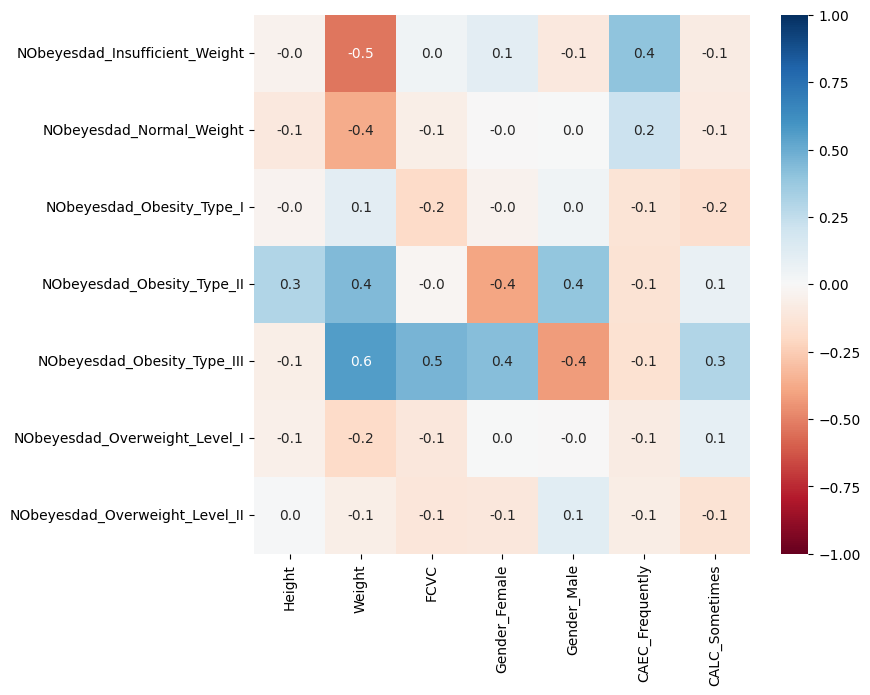

In [9]:
data_one_hot = pd.get_dummies(data)
label_columns = [x for x in data_one_hot.columns if "NObeyesdad" in x]

# Select columns with correlations with at least one label which is > 0.3
correlations_with_targets = data_one_hot.corr()
max_correlations = correlations_with_targets.loc[label_columns].max().abs()
mask = (max_correlations > 0.3) & (max_correlations < 1)


fig, ax = plt.subplots(figsize=(8, 7))

sb.heatmap(correlations_with_targets.loc[label_columns, mask],
           annot=True,  fmt=".1f",
           cmap="RdBu",
           vmin=-1, vmax=1)

#### Train/Test split

As done before, we will do a single split to divide the data into a training set and a test set. We will also apply the alternative, cross-correlation, later in this section.

In [10]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
# Let's check the outcome dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1583, 26), (528, 26), (1583,), (528,))

### Train a k-NN Classifier
We will here use a k-NN classifier for a first test. As introduced in {numref}`ch_ml_algorithms_1`, this algorithm requires data that is numerical and scaled. The scaling can be seen as part of the model, and we can use Scikit-learn pipelines to combine both steps:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=7)),
])

In [13]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=7))])

In [14]:
from sklearn.metrics import confusion_matrix

predictions = pipe.predict(X_test)

### Evaluate the Model
As introduced above, me have the choice between several different metrics to evalute our model. First, we look at accuracy, precision, recall, and f1-score.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Metrics for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')  # using 'weighted' to handle class imbalance
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

# Metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")


Training Metrics:
Accuracy: 0.8377
Precision: 0.8354
Recall: 0.8377
F1 Score: 0.8350

Test Metrics:
Accuracy: 0.8087
Precision: 0.8032
Recall: 0.8087
F1 Score: 0.8038


Instead of computing all of them individually using Scikit-Learn functions, we can also use pre-assembled functions such as `classification_report`:

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.94      0.89        78
      Normal_Weight       0.66      0.55      0.60        69
     Obesity_Type_I       0.80      0.77      0.79        86
    Obesity_Type_II       0.85      1.00      0.92        73
   Obesity_Type_III       0.98      0.99      0.98        88
 Overweight_Level_I       0.77      0.68      0.72        68
Overweight_Level_II       0.66      0.67      0.66        66

           accuracy                           0.81       528
          macro avg       0.79      0.80      0.79       528
       weighted avg       0.80      0.81      0.80       528



#### Confusion matrix
While those metrics have all their merits, often one of the most informative evaluation approaches for classification problems remains the confusion matrix. This not only gives a sense of the overall performance of a model, but also indicates which classes are often confused and hence seemingly difficult for the model to distinguish.

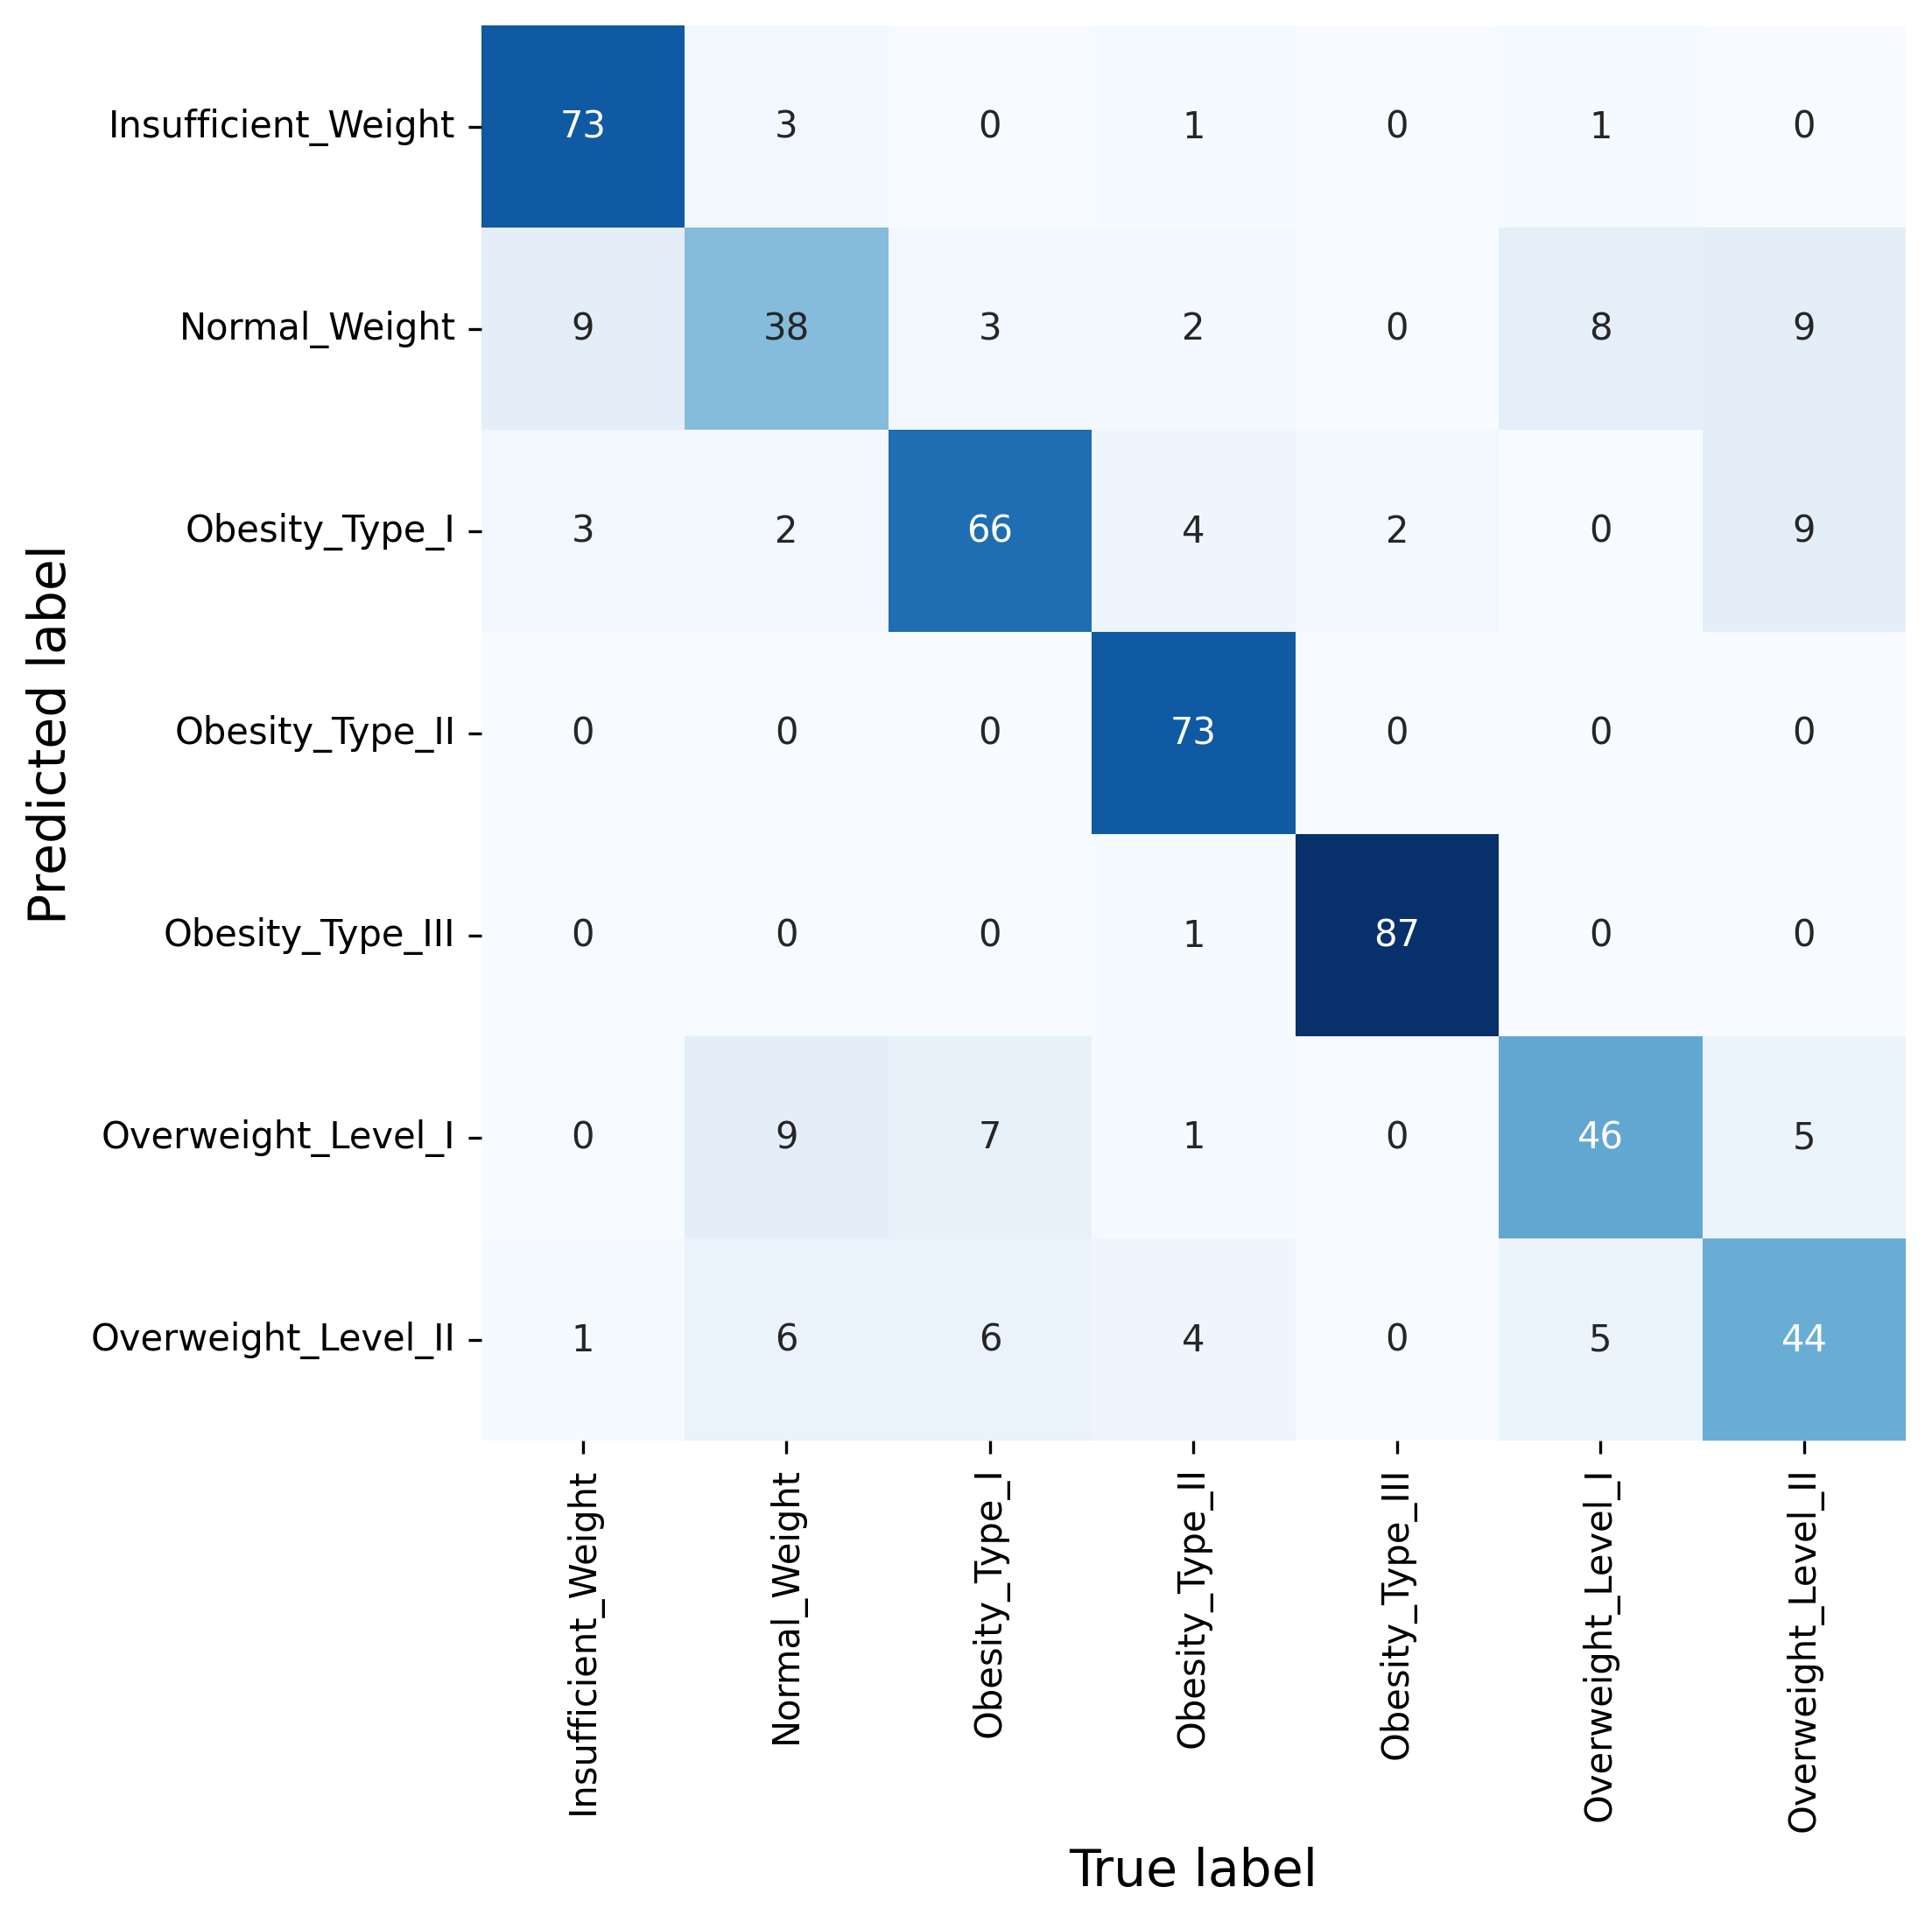

In [17]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=300)

sb.heatmap(confusion_matrix(y_test, predictions),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=pipe.classes_,
           yticklabels=pipe.classes_)
ax.set_xlabel("True label", fontsize=14)
ax.set_ylabel("Predicted label", fontsize=14)
plt.show()

### Hyperparameter Search
Although we used a simple k-NN model here, the results look OK-ish at first sight. But here are some questions for you:
- How do we know if this is just OK, or good, or excellent?
- How can we improve our model further? And is this even possible?

---

The answer is not always simple.

To judge whether or not a model is doing very well, we always need to have some references for comparison.
In the case we see here -and unlike the fraudulent phone call example in the beginning of this section- it is much harder to come up with a simple toy model here. A random model, for instance, would certainly do much worse.

So it is not all bad but also not making perfect predictions.
But is a perfect model even possible? And how can we optimize our model besides manually trying many different variations?

We can start with the model optimization because this is more straightforward.
At least for cases like the one at hand, where computation time is no restriction because the model and dataset are relatively small and simple. In such cases it is usually good enough to just run a systematic parameter search.

## Systematic Parameter Search

Finding the optimal set of parameters for machine learning models can dramatically improve their performance. Scikit-learn offers tools like `GridSearchCV` and `RandomizedSearchCV` to automate the search for the best hyperparameters.

### Grid Search

- **GridSearchCV**: Performs an exhaustive search over specified parameter values for an estimator. Useful when we are looking for a small number of hyperparameters.

### Random Search

- **RandomizedSearchCV**: Can sample a given number of candidates from a parameter space with a specified distribution. More efficient than GridSearchCV when dealing with a large hyperparameter space or when we aim to reduce the computational burden.

We will here only do a simple grid search using Scikit-Learn's `GridSearchCV`. This works with any Scikit-Learn machine learning model, but also with `Pipeline` objects as displayed in {numref}`fig_scikit_gridsearch`.

```{figure} ../images/fig_scikit_gridsearch.png
:name: fig_scikit_gridsearch

Scikit-Learn's `GridSearchCV` combines a grid search for systematically comparing different parameter sets with a cross-validation approach. GridSearchCV objects again follow the Scikit-Learn workflow and can be trained using `.fit()`. 
```

In [18]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier()),  # we don't have to add any parameter here!
])

In [19]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=pipe,
                    param_grid={
                        "model__n_neighbors": [2, 3, 4, 5, 10, 15, 20]
                    },
                    cv=5,
                    return_train_score=True,
                    verbose=1,  # set to 2 if you want more information during the run
                   )

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5, 10, 15, 20]},
             return_train_score=True, verbose=1)

After the training run the results for the different parameter settings can be compared.

In [21]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008354,0.000785,0.032765,0.003017,2,{'model__n_neighbors': 2},0.801262,0.839117,0.776025,0.803797,...,0.804167,0.020172,1,0.917062,0.921801,0.917062,0.910813,0.914759,0.916299,0.003575
1,0.009030,0.001091,0.037538,0.004634,3,{'model__n_neighbors': 3},0.801262,0.817035,0.763407,0.800633,...,0.799758,0.019502,2,0.887046,0.888626,0.895735,0.887135,0.891081,0.889924,0.003251
2,0.010817,0.001719,0.045460,0.004111,4,{'model__n_neighbors': 4},0.782334,0.798107,0.763407,0.781646,...,0.787757,0.016845,3,0.860979,0.860979,0.874408,0.862668,0.863457,0.864498,0.005048


We can also directly jump to the best performing parameter set:

In [22]:
grid.best_params_

{'model__n_neighbors': 2}

Or, we can have the `grid` object return the best performing model:

In [23]:
grid.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=2))])

The grid search is usually just meant to find the most suitable parameters. Once we found them, we would train a new model using those settings:

In [24]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=2)),
])

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=2))])

In the case of our k-NN model, this might not improve things much though...

In [26]:
y_pred_test = pipe.predict(X_test)

# Metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")


Test Metrics:
Accuracy: 0.8371
Precision: 0.8380
Recall: 0.8371
F1 Score: 0.8356


## Train a Decision Tree model instead

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
y_pred_test = tree.predict(X_test)

# Metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")


Test Metrics:
Accuracy: 0.6515
Precision: 0.7000
Recall: 0.6515
F1 Score: 0.6502


This is very poor. But this could easily be our bad choice of parameters. So let's again use a grid search here.

In [29]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree,
                    param_grid={
                        "max_depth": [5, 8, 10, 15, 20],
                        "min_samples_split": [2, 5, 10]
                    },
                    cv=3,
                    return_train_score=True,
                    verbose=1,  # set to 2 if you want more information during the run
                   )

In [30]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 8, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, verbose=1)

In [31]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
12,0.010023,0.000570,0.001392,0.000555,20,2,"{'max_depth': 20, 'min_samples_split': 2}",0.918561,0.903409,0.950664,0.924211,0.019701,1,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.010555,0.000427,0.001675,0.000486,15,2,"{'max_depth': 15, 'min_samples_split': 2}",0.905303,0.905303,0.943074,0.917893,0.017805,2,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.010670,0.000409,0.002025,0.000036,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.901515,0.905303,0.944972,0.917263,0.019654,3,0.990521,0.994313,0.997159,0.993998,0.002719


### Cross validation

We would now do the same as before: train a new model with the best parameters.
Here, however, we will now do another cross-validation run to illustrate what this does!

See also [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more information.

The data will be split 10 times into training and test set. For each split a model will be trained and evaluated.

In [32]:
from sklearn.model_selection import cross_validate

k_folds = 10
tree = DecisionTreeClassifier(max_depth=20, random_state=0)
scores = cross_validate(tree, X, y, cv=k_folds, scoring=["accuracy", "f1_macro"])
scores

{'fit_time': array([0.01916313, 0.01965213, 0.01699138, 0.01705766, 0.01803565,
        0.01768517, 0.01798344, 0.01892805, 0.01801014, 0.01914454]),
 'score_time': array([0.00491118, 0.00399446, 0.00294471, 0.00396323, 0.00300121,
        0.00404429, 0.00302124, 0.00307274, 0.00394773, 0.0030055 ]),
 'test_accuracy': array([0.80660377, 0.86255924, 0.95734597, 0.94312796, 0.95260664,
        0.93364929, 0.96208531, 0.95734597, 0.95260664, 0.95734597]),
 'test_f1_macro': array([0.80678078, 0.85822023, 0.95484148, 0.94288008, 0.9512887 ,
        0.93236129, 0.95966605, 0.9565235 , 0.94875626, 0.95594561])}

As we see, the `cross_validate` function collected the test accuracy and f1-values, because that is the metrics we specified under `scoring`. For each metric 10 values are collected, one for every split of the data. To get an overall estimate we can simply take the mean value. In addition, however, we also get an impression of how much variation we have in model performances between the different splits:

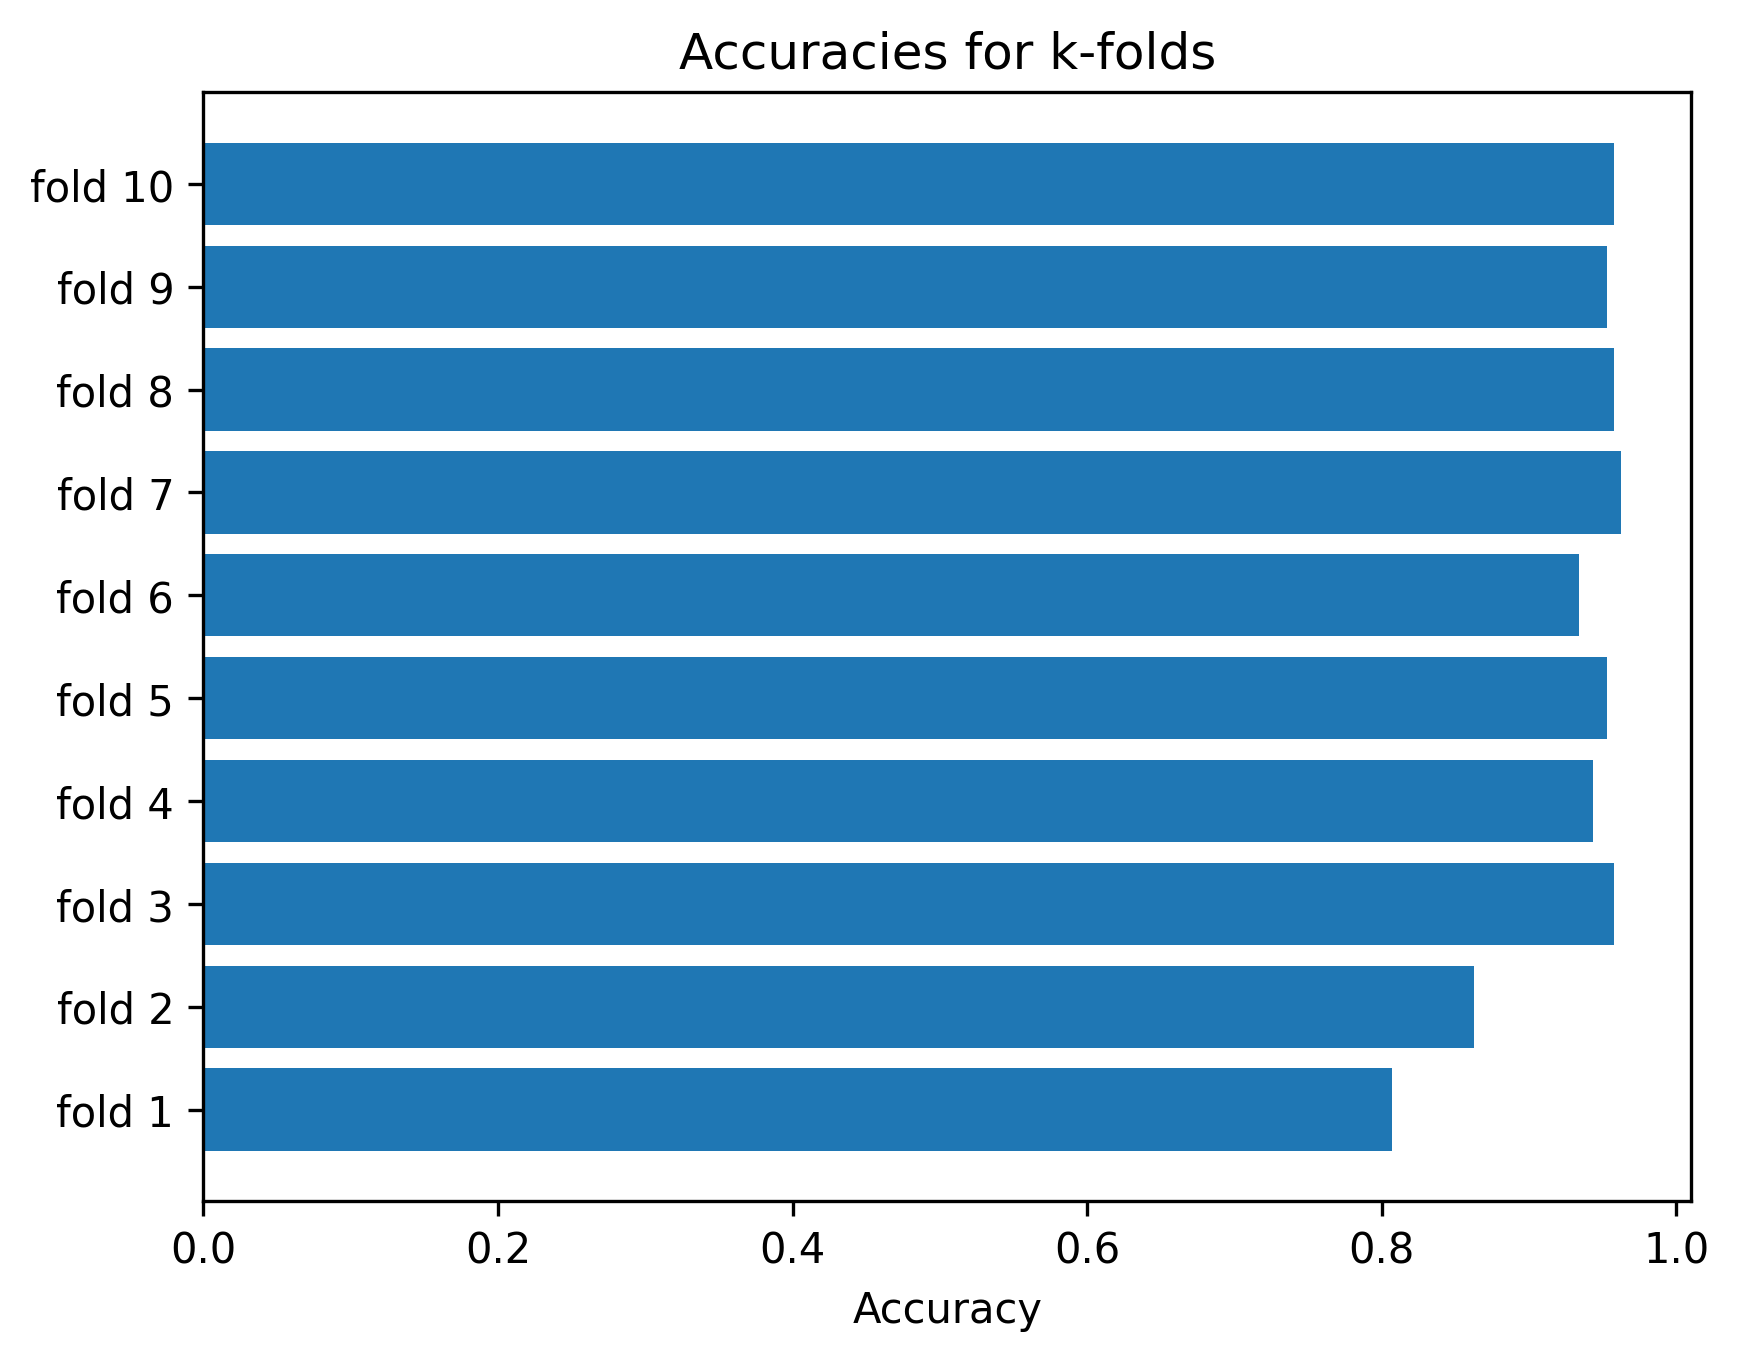

In [33]:
_, ax = plt.subplots(dpi=300)
ax.barh([f"fold {x}" for x in range(1, k_folds+1)],
         scores["test_accuracy"]
)
ax.set_title("Accuracies for k-folds")
ax.set_xlabel("Accuracy")
plt.show()

As we can see, the accuracy does depend strongly on the random split of the data! This effect is particularly strong in small and/or very heterogeneous datasets.